In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
#return_2018 = pd.read_csv('strategy_return_2018.csv')

# 2018

In [10]:
# Return, Cumulative Return and benchmark

In [108]:
dow_jones = yf.Ticker("^DJI").history(start='2018-01-01', end='2019-01-01')
benchmark_2018 = pd.DataFrame(dow_jones['Close'].pct_change().rename('Benchmark_Returns'))

# Convert the index of benchmark_returns to a 'Date' column, ensuring it's in the correct format
benchmark_2018.reset_index(inplace=True)
benchmark_2018['Date'] = pd.to_datetime(benchmark_2018['Date']).dt.strftime('%Y-%m-%d')

# Ensure the 'Date' column in strategy_return_df is in string format and also in the '%Y-%m-%d' format
return_2018['Date'] = pd.to_datetime(return_2018['Date']).dt.strftime('%Y-%m-%d')

# Make sure both Date columns are of the same data type, preferably string for a merge operation
return_2018['Date'] = return_2018['Date'].astype(str)
benchmark_2022['Date'] = benchmark_2018['Date'].astype(str)
combined_returns_2018 = pd.merge(return_2018, benchmark_2018, on='Date', how='inner')

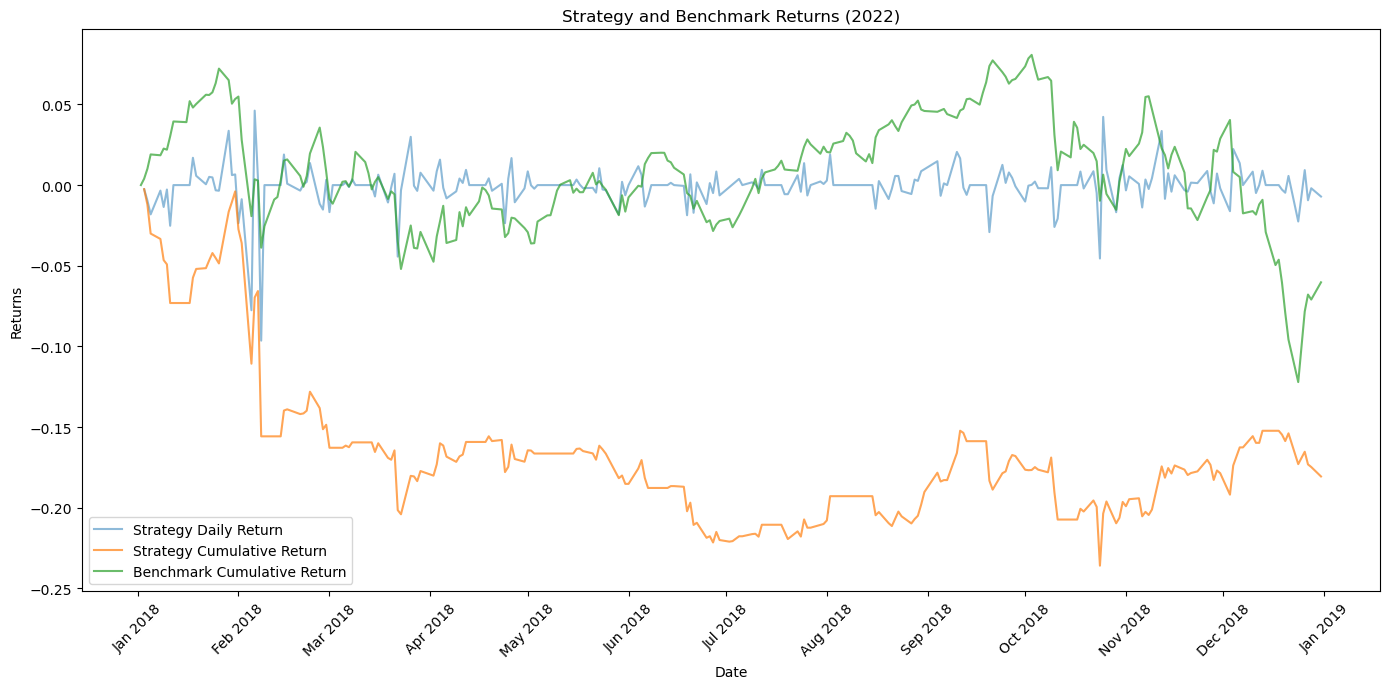

In [111]:
# Filling missing values in 'Benchmark_Returns' with 0 for plotting purposes
combined_returns_2018['Benchmark_Returns'].fillna(0, inplace=True)

# Calculate cumulative returns
combined_returns_2018['Strategy_Cumulative_Return'] = (1 + combined_returns_2018['0']).cumprod() - 1
combined_returns_2018['Benchmark_Cumulative_Return'] = (1 + combined_returns_2018['Benchmark_Returns']).cumprod() - 1

# Converting 'Date' to datetime format for better axis management
combined_returns_2018['Date'] = pd.to_datetime(combined_returns_2018['Date'])

plt.figure(figsize=(14, 7))

# Strategy Daily Return
plt.plot(combined_returns_2018['Date'], combined_returns_2018['0'], label='Strategy Daily Return', alpha=0.5)

# Strategy Cumulative Return
plt.plot(combined_returns_2018['Date'], combined_returns_2018['Strategy_Cumulative_Return'], label='Strategy Cumulative Return', alpha=0.7)

# Benchmark Cumulative Return
plt.plot(combined_returns_2018['Date'], combined_returns_2018['Benchmark_Cumulative_Return'], label='Benchmark Cumulative Return', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Strategy and Benchmark Returns (2022)')

# Improving the x-axis appearance
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


In [120]:
# Rolling Vol & Sharpe

,Date,0,Benchmark_Returns,Strategy_Cumulative_Return,Benchmark_Cumulative_Return
0,2018-01-02,NaN,0.000000,NaN,0.000000
1,2018-01-03,-0.002556,0.003975,-0.002556,0.003975
2,2018-01-04,-0.009605,0.006117,-0.012136,0.010116
3,2018-01-05,-0.018149,0.008803,-0.030065,0.019008
4,2018-01-08,-0.003434,-0.000509,-0.033396,0.018490
...,...,...,...,...,...
246,2018-12-24,-0.022554,-0.029100,-0.173014,-0.122132
247,2018-12-26,0.009281,0.049846,-0.165339,-0.078374
248,2018-12-27,-0.009406,0.011381,-0.173190,-0.067885
249,2018-12-28,-0.001957,-0.003303,-0.174807,-0.070964


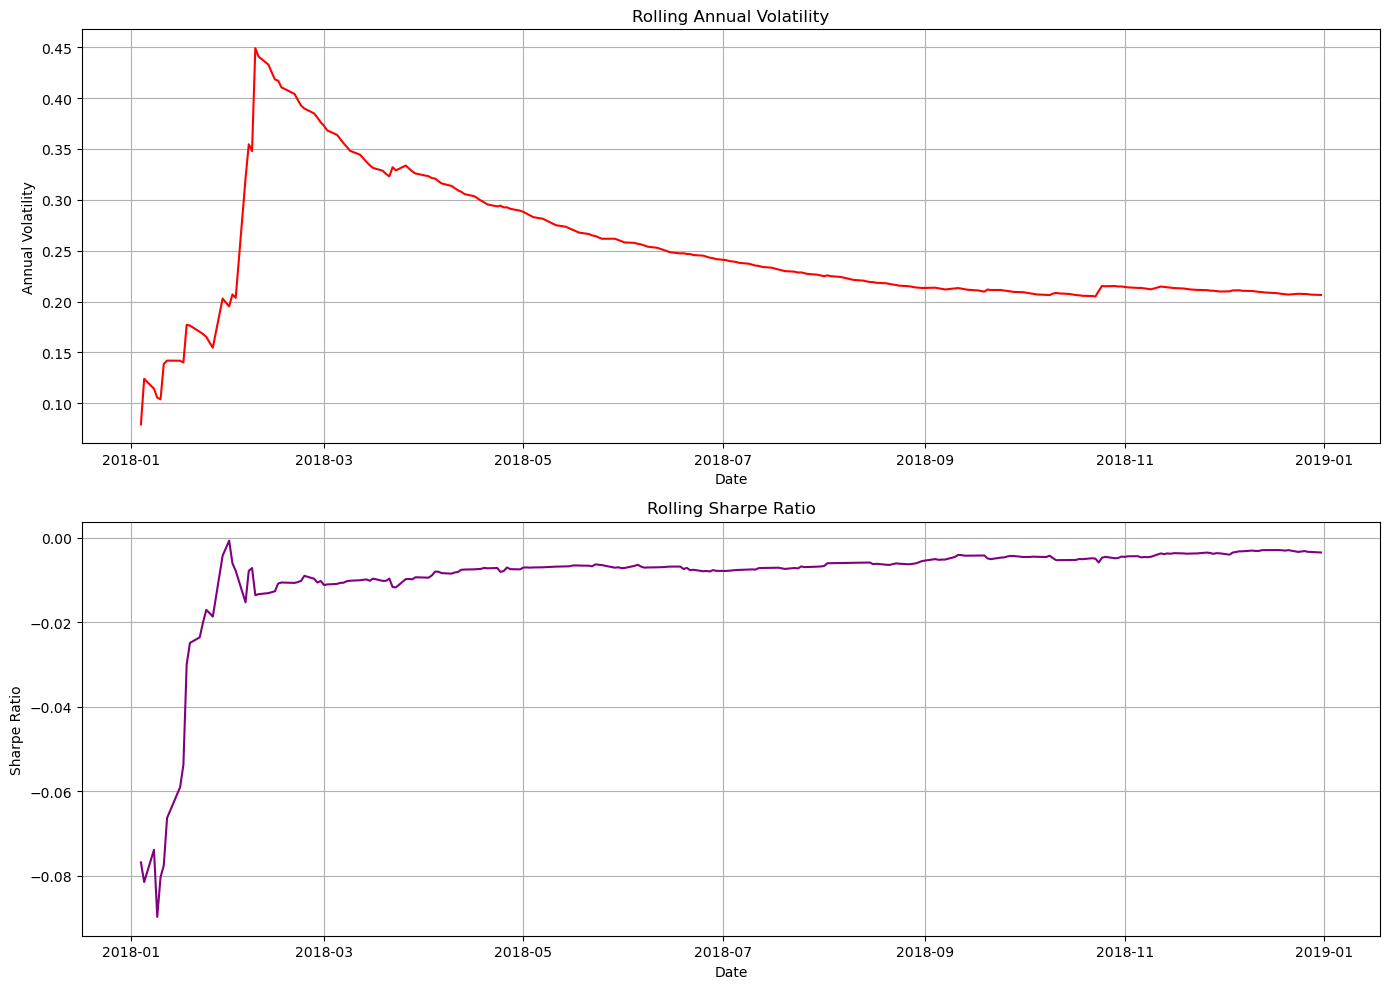

In [121]:
# Calculate rolling annual volatility and Sharpe ratio for the strategy
daily_returns = combined_returns_2018['0']  # Strategy daily returns
rolling_annual_volatility = daily_returns.rolling(window=252, min_periods=min_periods).std() * np.sqrt(252)
rolling_sharpe_ratio = daily_returns.rolling(window=252, min_periods=min_periods).mean() / (daily_returns.rolling(window=252, min_periods=min_periods).std() * np.sqrt(252))

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Rolling Annual Volatility
ax[0].plot(combined_returns_2018['Date'], rolling_annual_volatility, label='Annual Volatility', color='red')
ax[0].set_title('Rolling Annual Volatility')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Annual Volatility')
ax[0].grid(True)

# Rolling Sharpe Ratio
ax[1].plot(combined_returns_2018['Date'], rolling_sharpe_ratio, label='Sharpe Ratio', color='purple')
ax[1].set_title('Rolling Sharpe Ratio')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Sharpe Ratio')
ax[1].grid(True)

plt.tight_layout()
plt.show()



,Date,0,Benchmark_Returns,Strategy_Cumulative_Return,Benchmark_Cumulative_Return
0,2018-01-02,NaN,0.000000,NaN,0.000000
1,2018-01-03,-0.002556,0.003975,-0.002556,0.003975
2,2018-01-04,-0.009605,0.006117,-0.012136,0.010116
3,2018-01-05,-0.018149,0.008803,-0.030065,0.019008
4,2018-01-08,-0.003434,-0.000509,-0.033396,0.018490
...,...,...,...,...,...
246,2018-12-24,-0.022554,-0.029100,-0.173014,-0.122132
247,2018-12-26,0.009281,0.049846,-0.165339,-0.078374
248,2018-12-27,-0.009406,0.011381,-0.173190,-0.067885
249,2018-12-28,-0.001957,-0.003303,-0.174807,-0.070964


/Users/hanks/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


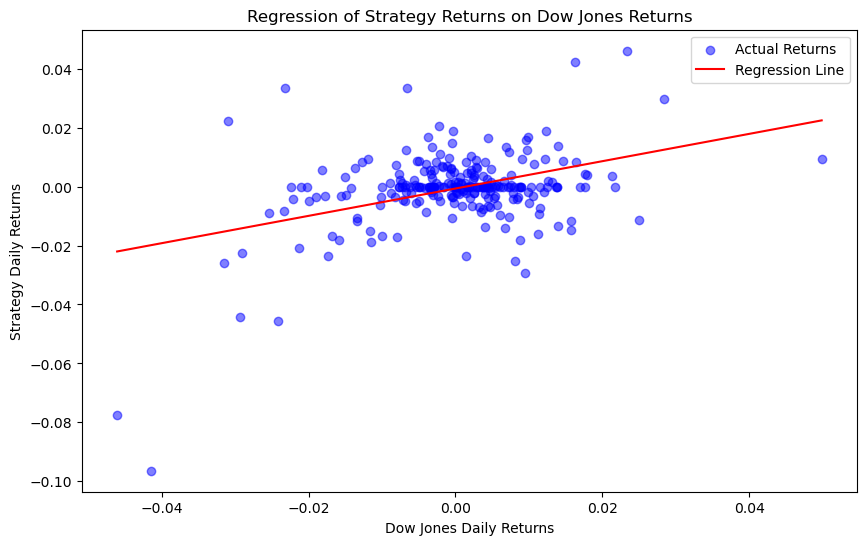

In [135]:
X = combined_returns_2018[['Benchmark_Returns']]  # Independent variable (Dow Jones returns)
y = combined_returns_2018['0'].fillna(0).values  # Dependent variable (Strategy returns)

# Fit the linear regression model
model = LinearRegression().fit(X, y)

# Generate a sequence of Dow Jones returns spanning the observed range to plot the regression line
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_fit = model.predict(X_fit)
strategy_beta = model.coef_[0]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Returns', alpha=0.5)  # Plot the actual data points
plt.plot(X_fit, y_fit, color='red', label='Regression Line')  # Plot the regression line
plt.xlabel('Dow Jones Daily Returns')
plt.ylabel('Strategy Daily Returns')
plt.title('Regression of Strategy Returns on Dow Jones Returns')
plt.legend()
plt.show()

In [136]:
strategy_beta

0.46417863907304

In [139]:
# Calculate annual return of the strategy
annual_return_strategy = (1 + combined_returns_2018['0'].fillna(0)).prod() ** (252 / len(combined_returns['0'])) - 1

# Calculate mean daily return of the Dow Jones and then its annualized mean return
mean_daily_return_dow_jones = combined_returns_2018['Benchmark_Returns'].fillna(0).mean()
annual_return_dow_jones = mean_daily_return_dow_jones * 252

# Calculate strategy alpha using the provided formula
strategy_alpha = annual_return_strategy - (strategy_beta * annual_return_dow_jones)

annual_return_strategy, annual_return_dow_jones, strategy_alpha

(-0.3373942052040262, -0.046403042836854626, -0.31585490393116705)

# 2020

In [51]:
# Load strategy return data
strategy_return_df = pd.read_csv('strategy_return_marchtojuly_2020.csv')
print(strategy_return_df.head())

         Date         0
0  2020-01-02       NaN
1  2020-01-03 -0.016376
2  2020-01-06  0.010865
3  2020-01-07  0.004926
4  2020-01-08  0.011634


In [75]:
dow_jones = yf.Ticker("DJI")  
benchmark_returns = pd.DataFrame(dow_jones.history(start='2020-01-01', end='2020-07-01')['Close'].pct_change()).rename({'Close': 'Benchmark_Returns'}, axis=1)

# Convert the index of benchmark_returns to a 'Date' column, ensuring it's in the correct format
benchmark_returns.reset_index(inplace=True)
benchmark_returns['Date'] = pd.to_datetime(benchmark_returns['Date']).dt.strftime('%Y-%m-%d')

# Ensure the 'Date' column in strategy_return_df is in string format and also in the '%Y-%m-%d' format
strategy_return_df['Date'] = pd.to_datetime(strategy_return_df['Date']).dt.strftime('%Y-%m-%d')

# Make sure both Date columns are of the same data type, preferably string for a merge operation
strategy_return_df['Date'] = strategy_return_df['Date'].astype(str)
benchmark_returns['Date'] = benchmark_returns['Date'].astype(str)
combined_returns = pd.merge(strategy_return_df, benchmark_returns, on='Date', how='inner')

In [78]:
combined_returns.to_csv('combined_returns.csv', index=False)


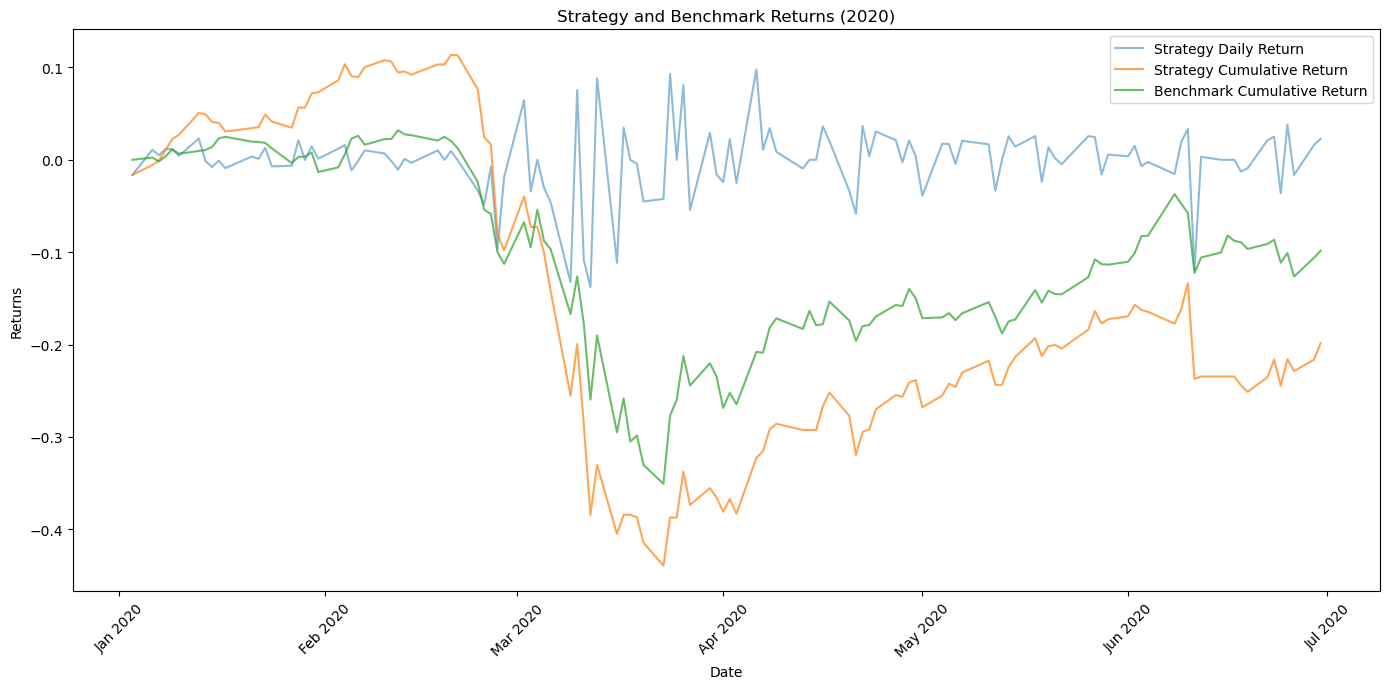

In [84]:
import matplotlib.dates as mdates

# Filling missing values in 'Benchmark_Returns' with 0 for plotting purposes
combined_returns['Benchmark_Returns'].fillna(0, inplace=True)

# Calculate cumulative returns
combined_returns['Strategy_Cumulative_Return'] = (1 + combined_returns['0']).cumprod() - 1
combined_returns['Benchmark_Cumulative_Return'] = (1 + combined_returns['Benchmark_Returns']).cumprod() - 1

# Converting 'Date' to datetime format for better axis management
combined_returns['Date'] = pd.to_datetime(combined_returns['Date'])

plt.figure(figsize=(14, 7))

# Strategy Daily Return
plt.plot(combined_returns['Date'], combined_returns['0'], label='Strategy Daily Return', alpha=0.5)

# Strategy Cumulative Return
plt.plot(combined_returns['Date'], combined_returns['Strategy_Cumulative_Return'], label='Strategy Cumulative Return', alpha=0.7)

# Benchmark Cumulative Return
plt.plot(combined_returns['Date'], combined_returns['Benchmark_Cumulative_Return'], label='Benchmark Cumulative Return', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Strategy and Benchmark Returns (2020)')

# Improving the x-axis appearance
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


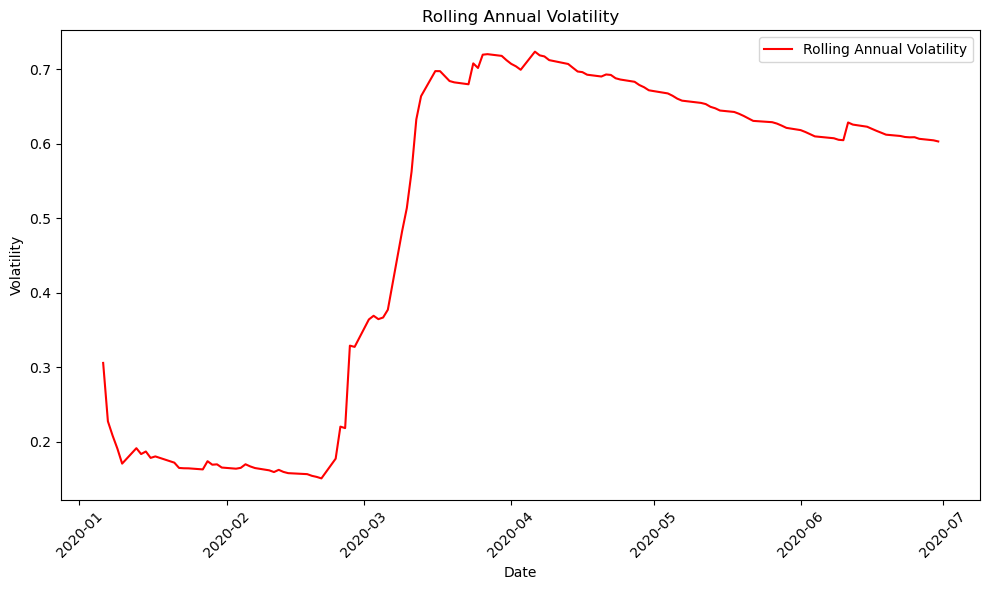

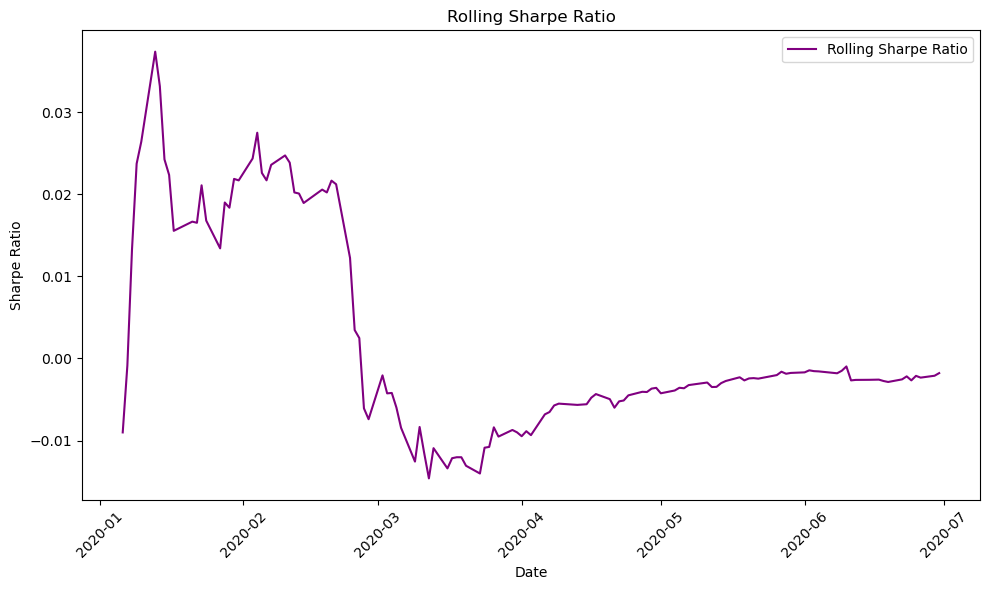

In [124]:
import numpy as np
# Calculate rolling annual volatility and Sharpe ratio for the strategy
daily_returns = combined_returns['0']  # Strategy daily returns

# Calculate rolling annual volatility
rolling_annual_volatility = combined_returns['0'].rolling(window=252, min_periods=min_periods).std() * np.sqrt(252)

# Calculate rolling Sharpe Ratio
rolling_sharpe_ratio = combined_returns['0'].rolling(window=252, min_periods=min_periods).mean() / (combined_returns['0'].rolling(window=252, min_periods=min_periods).std() * np.sqrt(252))

# Plotting Rolling Annual Volatility
plt.figure(figsize=(10, 6))
plt.plot(combined_returns['Date'], rolling_annual_volatility, label='Rolling Annual Volatility', color='red')
plt.title('Rolling Annual Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Rolling Sharpe Ratio
plt.figure(figsize=(10, 6))
plt.plot(combined_returns['Date'], rolling_sharpe_ratio, label='Rolling Sharpe Ratio', color='purple')
plt.title('Rolling Sharpe Ratio')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/Users/hanks/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


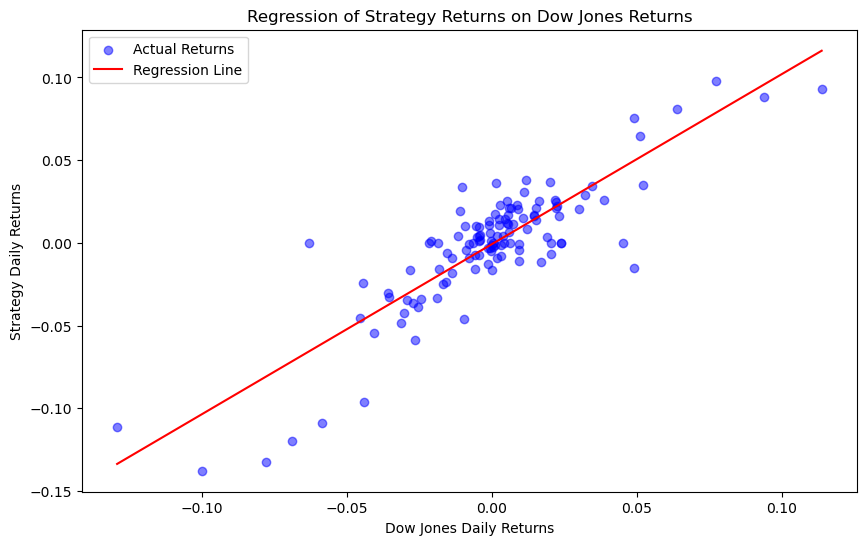

In [128]:
# The slope of the regression line (beta) represents the strategy's portfolio beta with respect to Dow Jones
strategy_beta = model.coef_[0]

from sklearn.linear_model import LinearRegression

X = combined_returns[['Benchmark_Returns']]  # Independent variable (Dow Jones returns)
y = combined_returns['0']  # Dependent variable (Strategy returns)

# Fit the linear regression model
model = LinearRegression().fit(X, y)

# Generate a sequence of Dow Jones returns spanning the observed range to plot the regression line
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_fit = model.predict(X_fit)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Returns', alpha=0.5)  # Plot the actual data points
plt.plot(X_fit, y_fit, color='red', label='Regression Line')  # Plot the regression line
plt.xlabel('Dow Jones Daily Returns')
plt.ylabel('Strategy Daily Returns')
plt.title('Regression of Strategy Returns on Dow Jones Returns')
plt.legend()
plt.show()


In [126]:
strategy_beta

1.028138348149412

In [137]:
# Calculate annual return of the strategy
annual_return_strategy = (1 + combined_returns['0'].fillna(0)).prod() ** (252 / len(combined_returns['0'])) - 1

# Calculate mean daily return of the Dow Jones and then its annualized mean return
mean_daily_return_dow_jones = combined_returns['Benchmark_Returns'].fillna(0).mean()
annual_return_dow_jones = mean_daily_return_dow_jones * 252

# Calculate strategy alpha using the provided formula
strategy_alpha = annual_return_strategy - (strategy_beta * annual_return_dow_jones)

annual_return_strategy, annual_return_dow_jones, strategy_alpha


(-0.3670646879016496, -0.08707810945745931, -0.3266448895606329)

# 2022

In [3]:
return_2022 = pd.read_csv('~/Downloads/strategy_return_2022to2023.csv')
return_2022.head()

,Date,0
0,2022-02-28,NaN
1,2022-03-01,0.006131
2,2022-03-02,-0.001207
3,2022-03-03,0.009365
4,2022-03-04,0.000000


In [4]:
dow_jones = yf.Ticker("^DJI").history(start='2022-03-01', end='2023-02-27')
benchmark_2022 = pd.DataFrame(dow_jones['Close'].pct_change().rename('Benchmark_Returns'))

# Convert the index of benchmark_returns to a 'Date' column, ensuring it's in the correct format
benchmark_2022.reset_index(inplace=True)
benchmark_2022['Date'] = pd.to_datetime(benchmark_2022['Date']).dt.strftime('%Y-%m-%d')

# Ensure the 'Date' column in strategy_return_df is in string format and also in the '%Y-%m-%d' format
return_2022['Date'] = pd.to_datetime(return_2022['Date']).dt.strftime('%Y-%m-%d')

# Make sure both Date columns are of the same data type, preferably string for a merge operation
return_2022['Date'] = return_2022['Date'].astype(str)
benchmark_2022['Date'] = benchmark_2022['Date'].astype(str)
combined_returns_2022 = pd.merge(return_2022, benchmark_2022, on='Date', how='inner')

/Users/yiyujie/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [29]:
combined_returns_2022['Strategy_Cumulative_Return']

0      0.006131
1      0.004917
2      0.014328
3      0.014328
4      0.014328
         ...   
244    0.151649
245    0.158803
246    0.163711
247    0.167932
248    0.182266
Name: Strategy_Cumulative_Return, Length: 249, dtype: float64

/var/folders/l_/m6g3497s5j77bqb9jr7506tc0000gn/T/ipykernel_35961/366487959.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_returns_2022['Benchmark_Returns'].fillna(0, inplace=True)


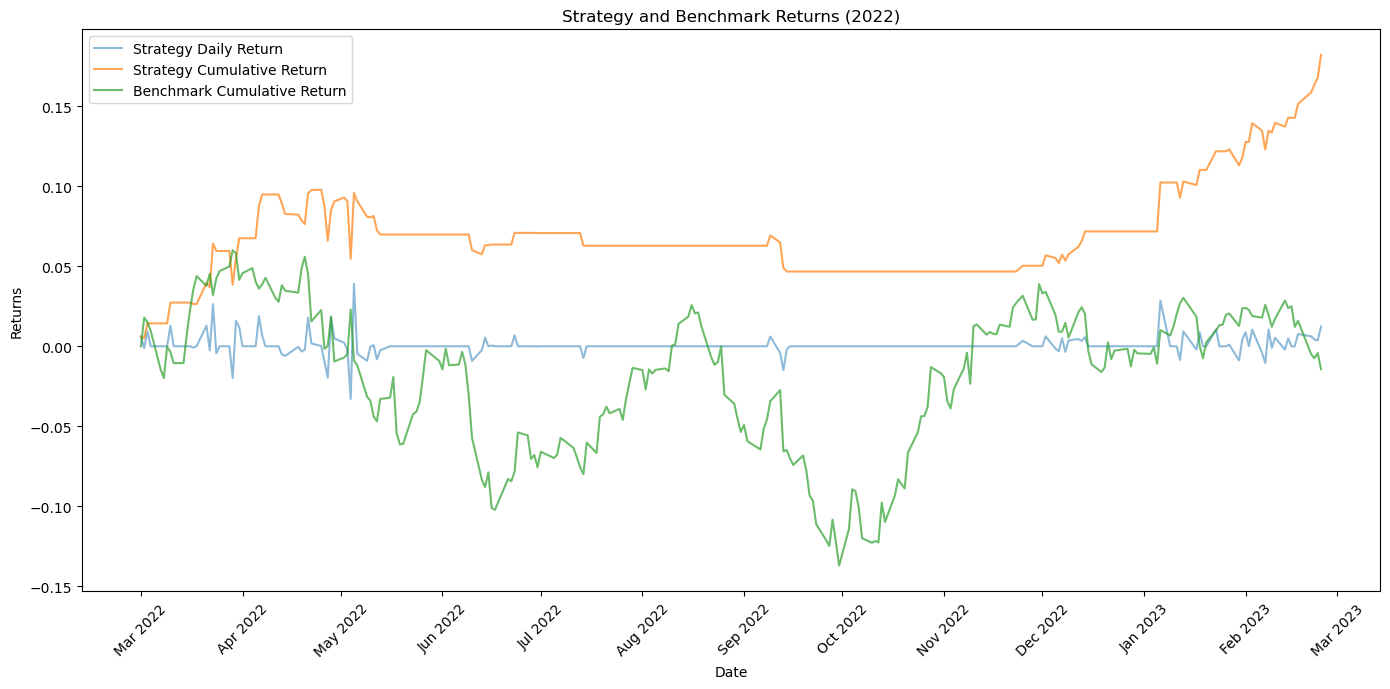

In [6]:
# Filling missing values in 'Benchmark_Returns' with 0 for plotting purposes
combined_returns_2022['Benchmark_Returns'].fillna(0, inplace=True)

# Calculate cumulative returns
combined_returns_2022['Strategy_Cumulative_Return'] = (1 + combined_returns_2022['0']).cumprod() - 1
combined_returns_2022['Benchmark_Cumulative_Return'] = (1 + combined_returns_2022['Benchmark_Returns']).cumprod() - 1

# Converting 'Date' to datetime format for better axis management
combined_returns_2022['Date'] = pd.to_datetime(combined_returns_2022['Date'])

plt.figure(figsize=(14, 7))

# Strategy Daily Return
plt.plot(combined_returns_2022['Date'], combined_returns_2022['0'], label='Strategy Daily Return', alpha=0.5)

# Strategy Cumulative Return
plt.plot(combined_returns_2022['Date'], combined_returns_2022['Strategy_Cumulative_Return'], label='Strategy Cumulative Return', alpha=0.7)

# Benchmark Cumulative Return
plt.plot(combined_returns_2022['Date'], combined_returns_2022['Benchmark_Cumulative_Return'], label='Benchmark Cumulative Return', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Strategy and Benchmark Returns (2022)')

# Improving the x-axis appearance
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


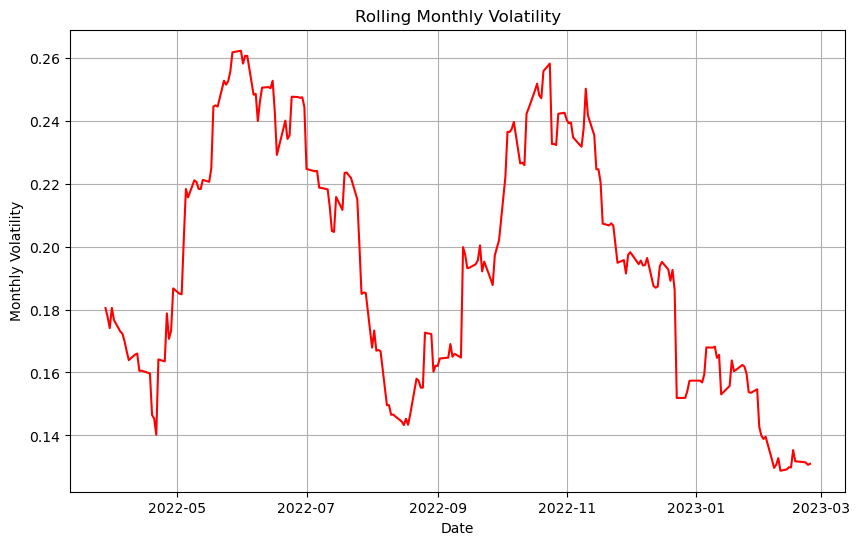

In [27]:
daily_returns = combined_returns_2022['Benchmark_Returns']
rolling_annual_volatility = daily_returns.rolling(window=30, min_periods=min_periods).std() * np.sqrt(252)

plt.figure(figsize=(10, 6))
plt.plot(combined_returns_2022['Date'], rolling_annual_volatility, label='Annual Volatility', color='red')
plt.title('Rolling Monthly Volatility')
plt.xlabel('Date')
plt.ylabel('Monthly Volatility')
plt.grid(True)

TypeError: 'Axes' object is not subscriptable

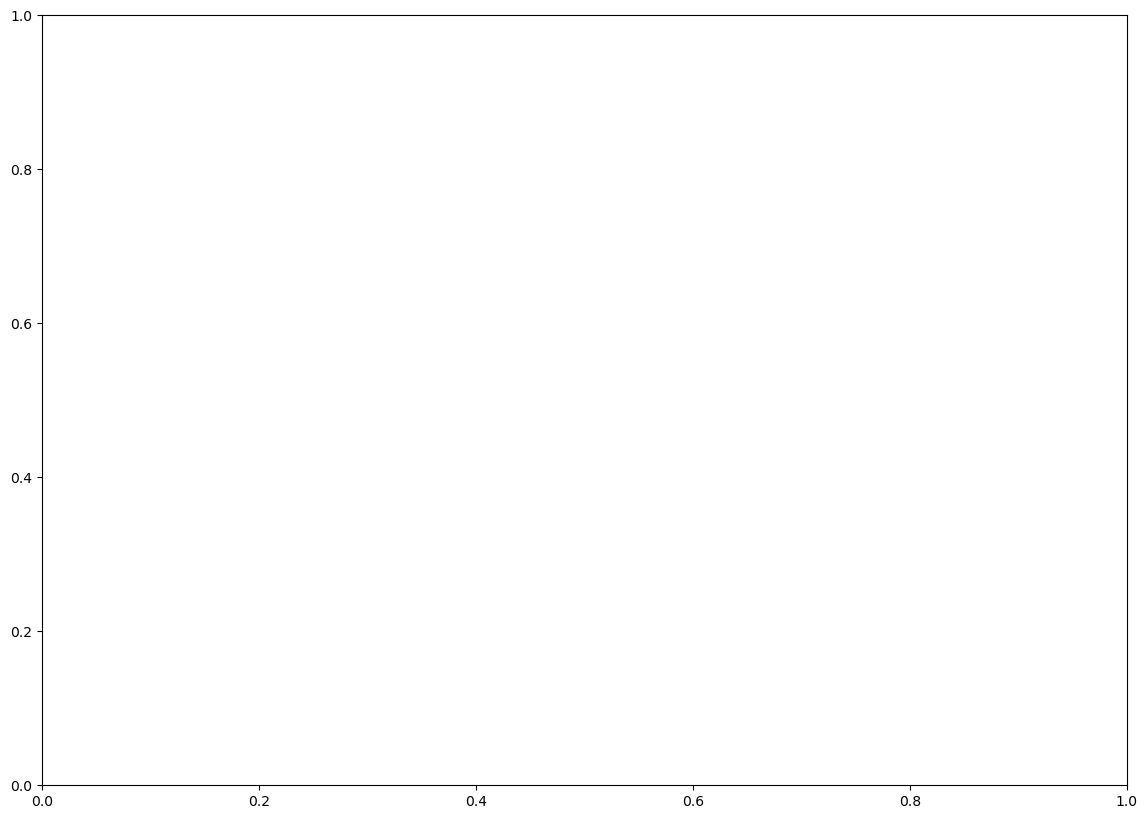

In [11]:
import numpy as np

# Calculate rolling annual volatility and Sharpe ratio for the strategy
daily_returns = combined_returns_2022['0']  # Strategy daily returns
min_periods = 20
rolling_annual_volatility = daily_returns.rolling(window=30, min_periods=min_periods).std() * np.sqrt(252)
rolling_sharpe_ratio = daily_returns.rolling(window=30, min_periods=min_periods).mean() / (daily_returns.rolling(window=30, min_periods=min_periods).std() * np.sqrt(30))

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# Rolling Annual Volatility
ax[0].plot(combined_returns_2022['Date'], rolling_annual_volatility, label='Annual Volatility', color='red')
ax[0].set_title('Rolling Monthly Volatility')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Monthly Volatility')
ax[0].grid(True)

'''# Rolling Sharpe Ratio
ax[1].plot(combined_returns_2022['Date'], rolling_sharpe_ratio, label='Sharpe Ratio', color='purple')
ax[1].set_title('Rolling Sharpe Ratio')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Sharpe Ratio')
ax[1].grid(True)'''

plt.tight_layout()
plt.show()


/Users/yiyujie/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


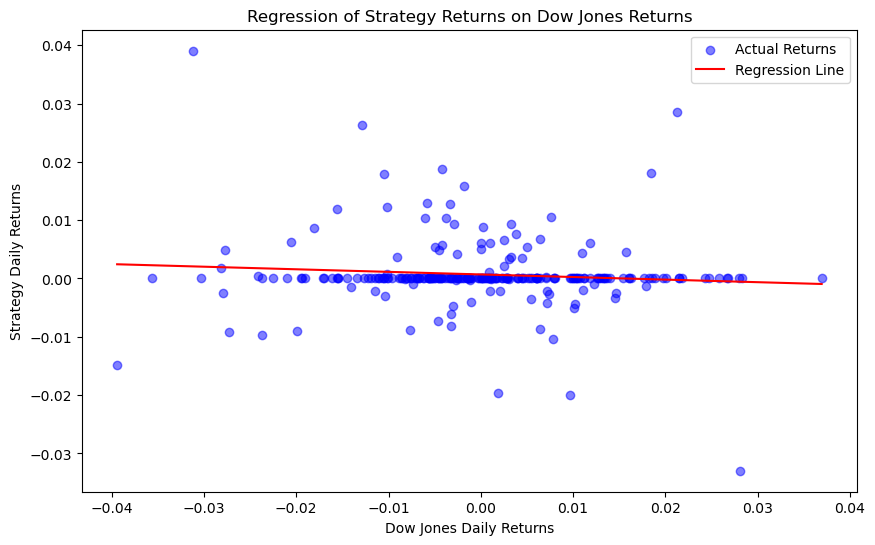

In [19]:
# The slope of the regression line (beta) represents the strategy's portfolio beta with respect to Dow Jones
#strategy_beta = model.coef_[0]
from sklearn.linear_model import LinearRegression

X = combined_returns_2022[['Benchmark_Returns']]  # Independent variable (Dow Jones returns)
y = combined_returns_2022['0']  # Dependent variable (Strategy returns)

# Fit the linear regression model
model = LinearRegression().fit(X, y)

# Generate a sequence of Dow Jones returns spanning the observed range to plot the regression line
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_fit = model.predict(X_fit)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Returns', alpha=0.5)  # Plot the actual data points
plt.plot(X_fit, y_fit, color='red', label='Regression Line')  # Plot the regression line
plt.xlabel('Dow Jones Daily Returns')
plt.ylabel('Strategy Daily Returns')
plt.title('Regression of Strategy Returns on Dow Jones Returns')
plt.legend()
plt.show()

In [28]:
model.intercept_

0.0006913625826638327

In [131]:
strategy_beta

-0.04424452477905523

In [138]:
# Calculate annual return of the strategy
annual_return_strategy = (1 + combined_returns_2022['0'].fillna(0)).prod() ** (252 / len(combined_returns['0'])) - 1

# Calculate mean daily return of the Dow Jones and then its annualized mean return
mean_daily_return_dow_jones = combined_returns_2022['Benchmark_Returns'].fillna(0).mean()
annual_return_dow_jones = mean_daily_return_dow_jones * 252

# Calculate strategy alpha using the provided formula
strategy_alpha = annual_return_strategy - (strategy_beta * annual_return_dow_jones)

annual_return_strategy, annual_return_dow_jones, strategy_alpha

(0.4131831449406118, 0.004387888122234978, 0.41114638100362805)